In [38]:
import pandas as pd
import numpy as np
from scipy import signal
from scipy.stats import entropy
import scipy.io as io
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

In [135]:
path = "../../../../"
data = io.loadmat('{}data/P01.mat'.format(path))

matriz = data['data']
print(matriz.shape)
print(len(matriz))   # x = epochs
print(len(matriz[0]))   # y = electrodos
print(len(matriz[0][0]))   # z = muestras 

(894, 256, 201)
894
256
201


In [3]:
electrodo8 = matriz[:,7,:]
print(electrodo8.shape)
print(electrodo8)

(894, 201)
[[ -1.89886281e-06  -1.00840373e-06   1.25017794e-06 ...,  -1.99776241e-05
   -1.88884188e-05  -1.71967869e-05]
 [ -4.72398852e-07  -6.27877221e-07  -1.48793420e-06 ...,  -4.96553432e-06
   -3.87947002e-06  -2.04118703e-06]
 [  6.30377343e-06   6.41721957e-06   6.73830393e-06 ...,   1.12358613e-05
    1.10880283e-05   9.89908993e-06]
 ..., 
 [ -1.08579175e-05  -1.06884899e-05  -1.05058022e-05 ...,  -1.88950742e-05
   -1.90880988e-05  -1.96135828e-05]
 [  5.97367336e-06   5.57200265e-06   5.13112625e-06 ...,   7.58558137e-06
    7.25155993e-06   6.95669955e-06]
 [  4.19202506e-08   1.75269527e-08   3.08250725e-07 ...,   1.90975674e-05
    1.96474922e-05   2.04587491e-05]]


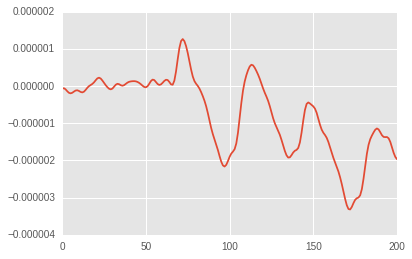

In [4]:
epoch_promedio = electrodo8.mean(axis=0)
plt.plot(epoch_promedio)

[   0.            1.24378109    2.48756219    3.73134328    4.97512438
    6.21890547    7.46268657    8.70646766    9.95024876   11.19402985
   12.43781095   13.68159204   14.92537313   16.16915423   17.41293532
   18.65671642   19.90049751   21.14427861   22.3880597    23.6318408
   24.87562189   26.11940299   27.36318408   28.60696517   29.85074627
   31.09452736   32.33830846   33.58208955   34.82587065   36.06965174
   37.31343284   38.55721393   39.80099502   41.04477612   42.28855721
   43.53233831   44.7761194    46.0199005    47.26368159   48.50746269
   49.75124378   50.99502488   52.23880597   53.48258706   54.72636816
   55.97014925   57.21393035   58.45771144   59.70149254   60.94527363
   62.18905473   63.43283582   64.67661692   65.92039801   67.1641791
   68.4079602    69.65174129   70.89552239   72.13930348   73.38308458
   74.62686567   75.87064677   77.11442786   78.35820896   79.60199005
   80.84577114   82.08955224   83.33333333   84.57711443   85.82089552
   87.06

/usr/local/lib/python2.7/dist-packages/scipy/signal/spectral.py:772: UserWarning: nperseg = 256, is greater than input length = 201, using nperseg = 201
  'using nperseg = {1:d}'.format(nperseg, x.shape[-1]))


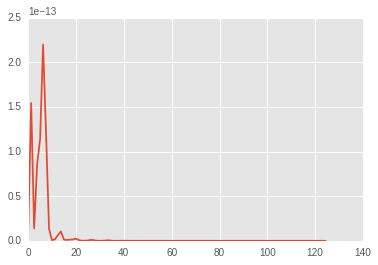

In [5]:
frec, power = signal.welch(x= epoch_promedio,fs = 250)
print(frec)
plt.plot(frec, power)

In [6]:
from matplotlib.colors import LogNorm


electrodo44 = matriz[:,43,:]
electrodo80 = matriz[:,79,:]
electrodo131 = matriz[:,130,:]
electrodo185 = matriz[:,184,:]

elec_promedio = np.array([electrodo8,electrodo44,electrodo80,electrodo131,electrodo185]).mean(axis=0)
print(elec_promedio.shape)


welchs = np.zeros((894,2,101))
for i_epoch in range(len(elec_promedio)):
    welchs[i_epoch] = signal.welch(x=elec_promedio[i_epoch], fs=250)
print(welchs.shape)    

#plt.plot(welchs[0,0,0:42],welchs[0,1,0:42])
#print(welchs[0,1,:42])

potencias = welchs[:,1,:42]


(894, 201)
(894, 2, 101)


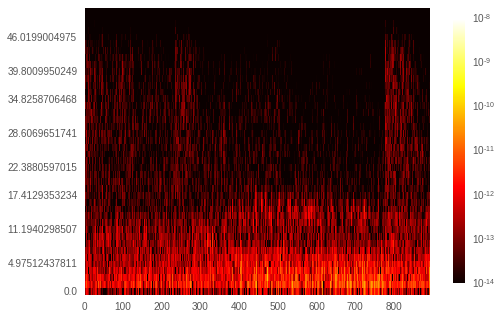

In [7]:
#sns.heatmap(potencias.T, norm=LogNorm(vmin=1.0e-14, vmax=1.0e-08))
#sns.plt.yticks(np.linspace(0,42,6), ['a','b','c','d','e','f'])
#sns.plt.xticks(np.linspace(100,800))
#sns.plt.show()
#sns.heatmap(potencias.T)

plt.axes([1,1,1,1])
plt.grid(False)
yticks = np.linspace(0,len(potencias[0]),10, dtype=np.int)
plt.yticks(yticks, welchs[0,0,yticks])
plt.imshow(potencias.T, interpolation='nearest', cmap='hot', origin='lower', aspect='auto', norm=LogNorm(vmin=1.0e-14, vmax=1.0e-08))
plt.colorbar(shrink=.92)
plt.show()

In [8]:
welchs_by_elect_and_epoch = np.empty((256,894,2,101))

for i_epoch in range(len(matriz)):
    epoch = matriz[i_epoch]
    for i_elect in range(len(epoch)):
        f,p = signal.welch(x=epoch[i_elect], fs=250)
        welchs_by_elect_and_epoch[i_elect,i_epoch] = np.array([f,p])

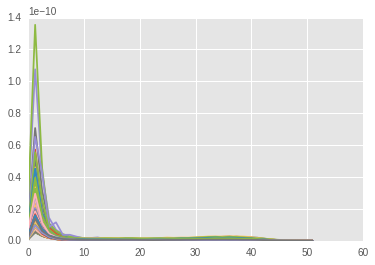

In [9]:
#print(welchs_by_elect_and_epoch.shape)
power_mean_between_epochs = welchs_by_elect_and_epoch.mean(axis=1)
#print(power_mean_between_epochs.shape)

for elect in power_mean_between_epochs:
    plt.plot(elect[0,:42], elect[1,:42])

plt.show()

punto b)

In [10]:
ranges = [0,4,8,13,30,45]
acums = np.zeros((5))
counts = np.zeros((5))

for i_band in range((len(ranges)-1)):
    for elect in welchs_by_elect_and_epoch:
        for epoch in elect:
            for welch in range(len(epoch[0])):
                if (epoch[0, welch] >= ranges[i_band]) and (epoch[0, welch] < ranges[i_band+1]):
                    acums[i_band] += epoch[1, welch]
                    counts[i_band] += 1
            

                
print(acums)
print(counts)

[  6.58608960e-06   8.87943699e-07   4.59869989e-07   8.68782998e-07
   6.68196664e-07]
[  915456.   686592.   915456.  3204096.  2746368.]


In [11]:
bands_means = acums / counts
bands_means

array([  7.19432676e-12,   1.29326252e-12,   5.02339805e-13,
         2.71147618e-13,   2.43301941e-13])

In [12]:
bands_means[2] 

5.0233980547724362e-13

In [14]:
pows = []
freqs = []
pacientes = [1]
for elect in welchs_by_elect_and_epoch:
    for epoch in elect:
        for welch in range(len(epoch[0])):
            if (epoch[0, welch] >= 8) and (epoch[0, welch] < 13):
                freqs.append(epoch[0, welch])
                pows.append(epoch[1, welch])



stripplot

(1e-14, 1e-09)

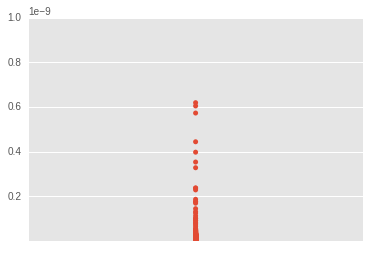

In [ ]:
ax =sns.stripplot(y=pows)
ax.set_autoscaley_on(True)
ax.set_ylim(1e-14,1e-9)
#pows

swarmplot

In [ ]:
ax =sns.swarmplot(x=pows)
ax.set_autoscalex_on(True)
ax.set_xlim(1e-14,1e-9)

KeyboardInterrupt: 

In [ ]:
scipy.stats.entropy([1,2,3])

In [63]:
from scipy.stats import binned_statistic
# calculo el electrodo promedio
elec = matriz[:,1,:]

#discritizo los valores de amplitud (voltajes) en bins mediante la regla de Freedman-Diaconis.
bins =  (np.histogram(elec, bins='fd',density=False))
# bins tiene las cantidades de cada amplitud en los distintos bins [0] y las respuectivas frecuencias asociadas
#bins
#entropy(bins[0])

In [66]:
def cantidad_informacion(elec):
    bins =  (np.histogram(elec, bins='fd',density=False)) 
    return entropy(bins[0])

# cantidad_informacion(matriz[:,1,:].mean(axis=0))

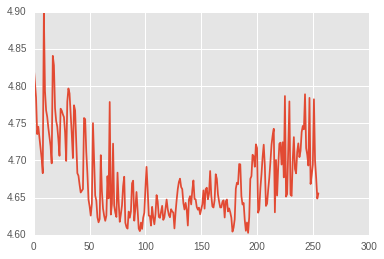

In [72]:
cant_inf = []
for i in range(matriz.shape[1]):
    cant_inf.append(cantidad_informacion(matriz[:,i,:]))
plt.plot(cant_inf)
#plot de todas las cantidades de informacion por electrodo

368013312

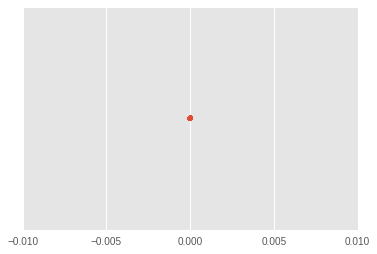

In [87]:
#calcular la media entre canales y epochs

sns.stripplot(media)
matriz.nbytes

In [138]:
mediasP = []
mediasS = []
for l in ['P','S']:
    for i in range(1,11):
        dat = io.loadmat('{0}data/{1}%02d.mat'.format(path,l) %i)
        mat = dat['data']
        media = mat.mean(axis=0).mean(axis=0)
        if l=='P':
            mediasP.append(media)
        else:
            mediasS.append(media)



KeyboardInterrupt: 

(1e-10, 1e-07)

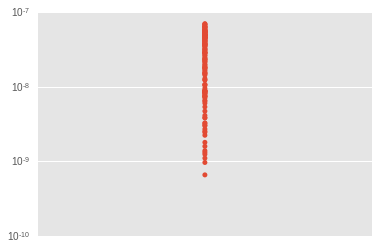

In [120]:
ax =sns.stripplot(y=mediasP[0]) # habria que agregar la de los otros pacientes
ax.set_yscale('log')
ax.set_ylim(1e-10,1e-7)

medida inter-electrodo